In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import re

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [22]:
df = pd.read_excel('C:\\Users\\user\\OneDrive\\Desktop\\FlightPrice.xlsx')

In [23]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [43]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Only one value of Trujet is found so we can drop it

In [25]:
df[df['Airline']=='Trujet']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2878,Trujet,6/03/2019,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3h 15m,1 stop,No info,4140


In [26]:
df.shape

(10683, 11)

In [27]:
df = df.drop(df.index[2878])

In [28]:
df.shape

(10682, 11)

In [21]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019


### Extract hours and minutes from time features

In [62]:
dat2 = []
for x in df['Date_of_Journey']:
    a = x.split("/")
    dat2.append(a[2])

In [64]:
df['Day'] = dat
df['Month'] = dat1
df['Year'] = dat2

In [67]:
df = df.drop('Date_of_Journey', axis = 1)

In [69]:
df = df.replace('non-stop',0).replace('1 stop',1).replace('2 stops',2).replace('3 stops',3).replace('4 stops',4)

In [71]:
df['Dep_hour'] = pd.DatetimeIndex(df['Dep_Time']).hour
df['Dep_min'] = pd.DatetimeIndex(df['Dep_Time']).minute
df['Arr_hour'] = pd.DatetimeIndex(df['Arrival_Time']).hour
df['Arr_min'] = pd.DatetimeIndex(df['Arrival_Time']).minute

In [83]:
len(df['Duration'][0].split(" "))

2

In [85]:
dur = []
for x in df['Duration']:
    n_dur = x.split(" ")
    dur.append(n_dur[0])
    

In [86]:
dura = []
for x in df['Duration']:
    n_dur = x.split(" ")
    if len(n_dur) == 1:
        dura.append(0)
    else:
        dura.append(n_dur[1])

In [90]:
len(dura)

10682

In [91]:
df['Dur_hour'] = dur
df['Dur_min'] = dura

In [94]:
df['Dur_hour'] = df['Dur_hour'].replace(r'[^0-9]',"", regex=True)
df['Dur_min'] = df['Dur_min'].replace(r'[^0-9]',"", regex=True)

In [103]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,05,5,50,13,15,7,25


In [102]:
df = df.drop(['Route','Dep_Time','Arrival_Time','Duration','Year'],axis = 1)

In [116]:
df = df.to_excel('New_FlightPPP.xlsx')

In [9]:
df = pd.read_excel('New_FlightPPP.xlsx')

In [10]:
df.dropna(inplace = True)

### Apply one hot encoding to nominal features

In [11]:
df1 = pd.get_dummies(df[['Airline','Source','Destination','Additional_Info']])

In [12]:
new_data = pd.concat([df,df1],axis=1)

In [13]:
new_data.drop(['Airline','Source','Destination','Additional_Info'],axis = 1, inplace = True)

In [14]:
new_data.drop('Additional_Info_No info',axis=1,inplace=True)

### Now our model is ready to apply the alogorithms

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor

In [15]:
y_trn = new_data.drop('Price',axis=1)

In [16]:
X = new_data['Price']

In [17]:
etr = ExtraTreesRegressor()
etr.fit(y_trn,X)

ExtraTreesRegressor()

In [18]:
print(etr.feature_importances_)

[2.37970807e-01 9.70378188e-02 4.97690546e-02 2.01557417e-02
 1.84307489e-02 2.38028573e-02 1.54778038e-02 1.01997425e-01
 1.51961929e-02 1.62046381e-03 8.51617138e-03 1.56456965e-03
 1.61105417e-02 1.37917876e-01 6.47506862e-02 1.75303948e-02
 7.82697548e-04 3.01444853e-03 4.62252982e-03 7.48169274e-05
 1.26976997e-02 4.63995902e-04 1.08731887e-02 2.18077898e-03
 4.66106709e-03 2.27218947e-03 1.08956082e-02 8.50403989e-03
 4.67189001e-03 5.26865568e-04 1.92185500e-02 1.75300964e-03
 7.52024296e-04 7.16964412e-04 1.10308776e-03 5.97486529e-04
 8.16160583e-02 7.54094359e-05 7.10254246e-05 5.41391658e-06]


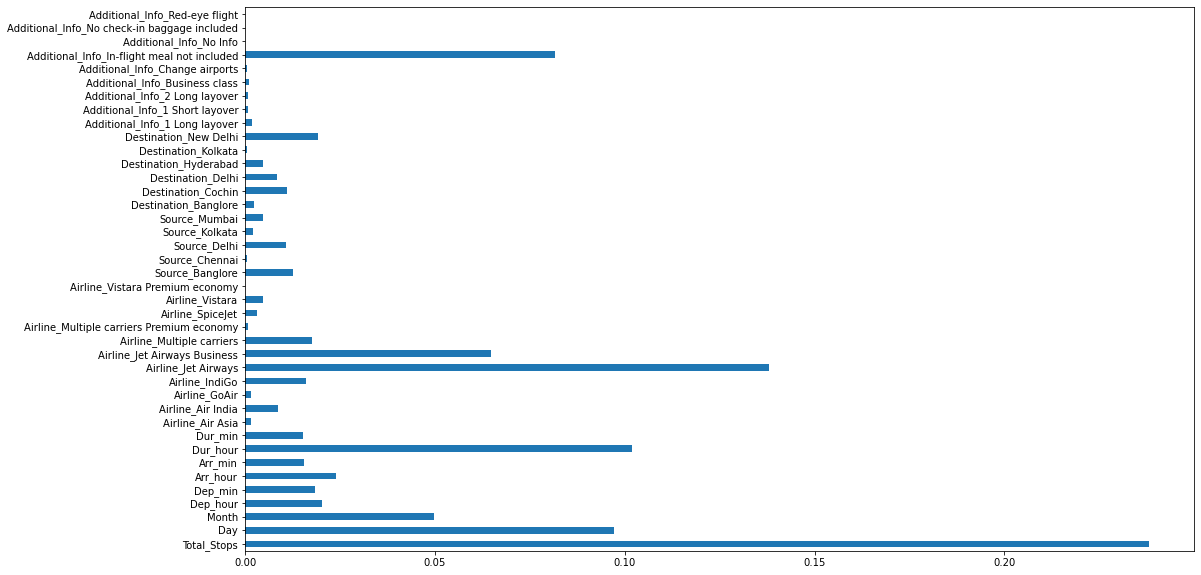

In [22]:
plt.figure(figsize = (17,10))
p = pd.Series(etr.feature_importances_, index = y_trn.columns)
p.plot.barh()

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(y_trn,X, train_size = 0.75, random_state = 5)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,Y_train)

LinearRegression()

In [27]:
pred = lr.predict(X_test)

### Lets see relationship between Predicted values and Actual values with Linear regressor and Random Forest regressor

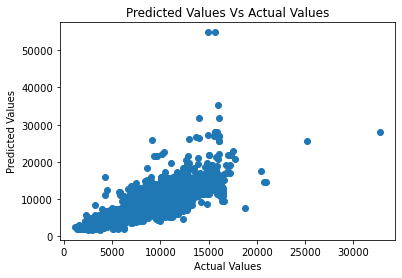

In [28]:
plt.scatter(pred,Y_test)
plt.title('Predicted Values Vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [41]:
accuracy = r2_score(Y_test,pred)
rmse_lr = np.sqrt(mean_squared_error(Y_test, pred))
print('accuracy-- ',accuracy)
print('rmse--- ',rmse_lr)

accuracy--  0.6468708343123535
rmse---  2753.0431784650436


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [31]:
rfr = RandomForestRegressor()

In [32]:
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [34]:
pred_rf = rfr.predict(X_test)

### Draw best fit line

In [44]:
a, b = np.polyfit(Y_test,pred_rf,1)

In [45]:
print('Slope = ',a)
print('y int = ',b)

Slope =  0.8889490628805802
y int =  1020.3814505395449


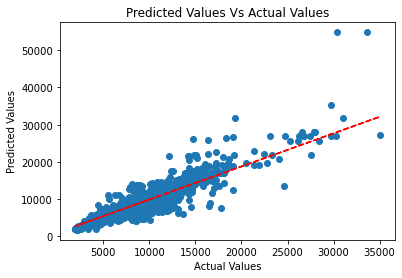

In [48]:
plt.scatter(pred_rf,Y_test)
plt.plot(pred_rf, pred_rf*a+b,'--', color='r')
plt.title('Predicted Values Vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [36]:
rmse = np.sqrt(mean_squared_error(Y_test, pred_rf))

In [37]:
rmse

1465.5515211715715

In [38]:
accuracy1 = r2_score(Y_test,pred_rf)
accuracy1

0.8999286580356767